Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical


import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


Load built-in MNIST dataset

In [2]:
fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Using either OpenCV or Matplotlib, view some random samples. Don't use ones for row and col

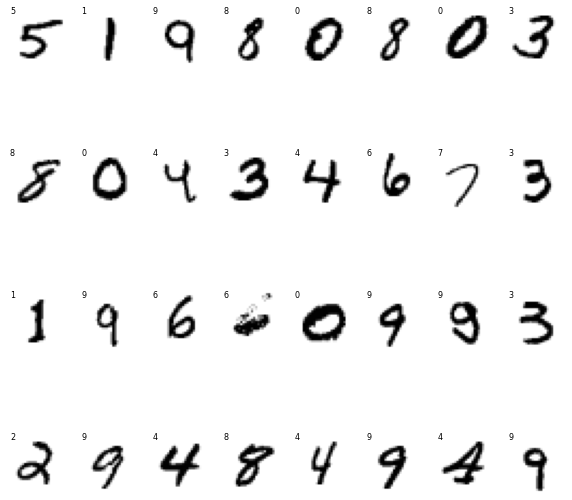

In [3]:
[row, col] = [4, 8]

limit = row * col

fig, axs = plt.subplots(int(limit/col), int(col), figsize=(10, 10))

for x in range(limit):
    randomint = np.random.randint(60000)
    test = X_train_full[randomint]
    test = np.reshape(test, (28, 28))
    axs[int(x/col), x%col].imshow(test, cmap="binary")
    axs[int(x/col), x%col].axis("off")
    axs[int(x/col), x%col].text(2, 2, str(y_train_full[randomint]), fontsize=8, ha='center')

plt.show()

Build the model

In [4]:
model = models.Sequential()

model.add(keras.Input(shape=[28, 28, 1]))


model.add(layers.Conv2D(64, kernel_size=[3,3], activation="relu"))
model.add(layers.Conv2D(32, kernel_size=[3,3], activation="relu"))

model.add(layers.MaxPool2D(pool_size=[2,2]))
model.add(layers.Flatten())


model.add(layers.Dropout(0.25))
model.add(layers.Dense(128))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Train the model

In [6]:
#train_images = X_train_full.reshape((60000, 28 * 28))
#train_images = train_images.astype('float32') / 255
train_images = np.expand_dims(X_train_full, axis=-1)
train_labels = to_categorical(y_train_full,10)

res = model.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 136s 3ms/sample - loss: 0.5377 - accuracy: 0.8943 - val_loss: 0.0995 - val_accuracy: 0.9705

Evaluate the model

In [8]:
X_test_expanded = np.expand_dims(X_test, axis=-1)
y_test_expanded = to_categorical(y_test,10)

score = model.evaluate(X_test_expanded, y_test_expanded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05487903388968553
Test accuracy: 0.984


[[6.1610822e-10 2.5247179e-08 9.7779748e-06 4.7096179e-07 1.9361679e-11
  1.5552599e-10 3.0528274e-13 9.9998975e-01 9.0252950e-10 9.6604120e-09]]
[7]


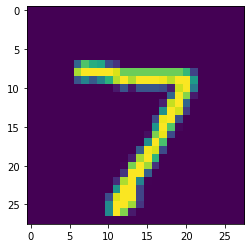

In [27]:
a_data = X_test_expanded[0]
a_data = np.expand_dims(a_data, axis=0)
a_data.shape

a_label = y_test_expanded[0]
a_label = np.expand_dims(a_label, axis=0)
a_label.shape

plt.imshow(X_test_expanded[0])

model.predict(a_data)
print(model.predict(a_data))

model.predict_classes(a_data)
print(model.predict_classes(a_data))

Visualize the simple test

In [ ]:
[row, col] = [4, 8]

limit = row * col

fig, axs = plt.subplots(int(limit/col), int(col), figsize=(10, 10))

for x in range(limit):
    randomint = np.random.randint(10000)
    a_data = X_test_expanded[randomint]
    a_data = np.expand_dims(a_data, axis=0)
    a_data.shape
    test = np.reshape(a_data, (28, 28))
    axs[int(x/col), x%col].imshow(test, cmap="binary")
    axs[int(x/col), x%col].axis("off")
    axs[int(x/col), x%col].text(2, 2, str(model.predict_classes(a_data)), fontsize=8, ha='center')

plt.show()